# Data Exploration
In a city as busy as New York, there is a constant presence of cranes and construction crews. Between the new businesses, residences, and attractions that are constructed in the city each year one can only wonder just how much construction is taking place. A great way to find out is by researching the number of building permits the New York City Department of Buildings issues each year, since permits are required before beginning any construction in the city.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.pyplot as plt
from __future__ import division
from geopandas import GeoDataFrame 

# Set max column display width to 55
pd.set_option("display.max_columns", 55)

# Read the Data
To get started with the analysis, we will load the data set saved in the local drive. We will need to do this in order to manipulate the data using the pandas library.

Viewing the data helped in getting a sense of what the data contained but we will take things a bit further by creating graphs and maps below.

In [2]:
df = pd.read_csv('C:/Users/ansha/Desktop/DOB_Permit_Issuance.csv', low_memory=False)

In [3]:
df.head(10)

,,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,...,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BRONX,2102476,200,E 135TH STREET,240249842,1,A2,Y,2319,120,201.0,10451.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,3/26/2019 0:00,3/26/2019 0:00,3/25/2020 0:00,...,1548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTNERSHIP,N,CUBESMART LP,MARK,SHORTLIDGE,5,OLD LANCATER ROAD,MALVERN,PA,19355,6104011458,3/27/2019 0:00,3608996,40.810699,-73.931313,8.0,51.0,Mott Haven-Port Morris
1,MANHATTAN,1090833,249,WEST 14 STREET,140818435,1,A3,Y,764,10,104.0,10011.0,2.0,NaN,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,3/26/2019 0:00,3/26/2019 0:00,3/25/2020 0:00,...,607447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTNERSHIP,N,SPRING SCAFFOLDING LLC,WILLIAM,LAFFEY,49-30,31ST PLACE,LIC,NY,11101,7183924921,3/27/2019 0:00,3609359,40.739151,-74.001075,3.0,81.0,Hudson Yards-Chelsea-Flatiron-Union Square
2,MANHATTAN,1015903,20,WEST 36TH STREET,123372466,2,A2,Y,837,58,105.0,10018.0,2.0,NaN,NaN,NaN,MH,ISSUED,INITIAL,EW,1,MH,NaN,NaN,3/26/2019 0:00,3/26/2019 0:00,7/18/2019 0:00,...,619626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,"STATECOURT EN, C/O KOEPPEL ROSEN",DAVID,KOEPPEL,40,EAST 69TH STREET,NEW YORK,NY,10021,2122491550,3/27/2019 0:00,3609159,40.750090,-73.984513,4.0,84.0,Midtown-Midtown South
3,QUEENS,4467709,14-30,BROADWAY,421105618,1,A2,Y,529,2,401.0,11106.0,2.0,NaN,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NOT APPLICABLE,3/26/2019 0:00,3/26/2019 0:00,9/15/2019 0:00,...,14698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYC AGENCY,N,NYC SCA,EFTIHIA,TSITIRIDIS,30-30,THOMSON AVENUE,LONG ISLAND CIT,NY,11101,7184728000,3/27/2019 0:00,3609358,40.765826,-73.932800,22.0,45.0,Astoria
4,QUEENS,4048873,42-06,108 STREET,421024689,1,A1,N,1986,37,404.0,11368.0,2.0,YES,NaN,NaN,NaN,ISSUED,RENEWAL,AL,5,NaN,NaN,NOT APPLICABLE,3/21/2019 0:00,3/26/2019 0:00,3/25/2020 0:00,...,618937.0,NaN,NaN,NaN,NaN,NaN,NaN,JACKSON TAM,NaN,INDIVIDUAL,N,NaN,CALOGERO,MULE,42-06,108 STREET,QUEENS,NY,11368,7182785872,3/27/2019 0:00,3606599,40.749221,-73.858003,21.0,403.0,North Corona
5,BRONX,2085547,285,W 261 STREET,220690786,1,A2,Y,5884,1180,208.0,10471.0,1.0,YES,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,3/26/2019 0:00,3/26/2019 0:00,3/25/2020 0:00,...,1682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,ERIC,DIDOMENICO,285,WEST 261 STREET,BRONX,NY,10471,9179237974,3/27/2019 0:00,3609211,40.909601,-73.899786,11.0,337.0,North Riverdale-Fieldston-Riverdale
6,QUEENS,4094152,87-03,81ST ROAD,421671097,1,A2,Y,3849,34,405.0,11385.0,2.0,YES,NaN,NaN,MH,ISSUED,RENEWAL,EW,2,MH,NaN,NOT APPLICABLE,3/26/2019 0:00,3/26/2019 0:00,2/16/2020 0:00,...,613674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,HANOLI CAKES INC,MONICA,MENA,87-03,81ST ROAD,RIDGEWOOD,NY,11385,9177235735,3/27/2019 0:00,3608995,40.703178,-73.859847,30.0,639.0,Glendale
7,MANHATTAN,1058592,2288,FREDRICK DOUGLAS BLVD,123510487,1,A2,Y,1928,61,110.0,10027.0,2.0,NaN,NaN,NaN,PL,ISSUED,INITIAL,PL,1,NaN,NaN,NOT APPLICABLE,3/26/2019 0:00,3/26/2019 0:00,3/25/2020 0:00,...,1253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,SIDO,EMILE,AKLEH,2288,FREDRICK DOUGLAS BLVD,NEW YORK,NY,10027,9173593323,3/27/2019 0:00,3609356,40.808766,-73.952183,9.0,222.0,Central Harlem South
8,QUEENS,4617617,157,BEACH 96 STREET,421360084

### How many building permits are issued in NYC each year?
Subset data for 'issued' permit status since we want to explore issued permit status, then count the number of permits by year.

In [4]:
list(df)

[' ',
 'Bin #',
 'House #',
 'Street Name',
 'Job #',
 'Job doc. #',
 'Job Type',
 'Self_Cert',
 'Block',
 'Lot',
 'Community Board',
 'Zip Code',
 'Bldg Type',
 'Residential',
 'Special District 1',
 'Special District 2',
 'Work Type',
 'Permit Status',
 'Filing Status',
 'Permit Type',
 'Permit Sequence #',
 'Permit Subtype',
 'Oil Gas',
 'Site Fill',
 'Filing Date',
 'Issuance Date',
 'Expiration Date',
 'Job Start Date',
 "Permittee's First Name",
 "Permittee's Last Name",
 "Permittee's Business Name",
 "Permittee's Phone #",
 "Permittee's License Type",
 "Permittee's License #",
 'Act as Superintendent',
 "Permittee's Other Title",
 'HIC License',
 "Site Safety Mgr's First Name",
 "Site Safety Mgr's Last Name",
 'Site Safety Mgr Business Name',
 'Superintendent First & Last Name',
 'Superintendent Business Name',
 "Owner's Business Type",
 'Non-Profit',
 "Owner's Business Name",
 "Owner's First Name",
 "Owner's Last Name",
 "Owner's House #",
 "Owner's House Street Name",
 'Owner’

In [5]:
df = df[df['Permit Status'] == 'ISSUED']

In [6]:
df['Issuance Date'] = pd.to_datetime(df['Issuance Date'], infer_datetime_format=True)

In [7]:
df['Issuance Date'].dt.year.value_counts()

2017    193541
2016    188861
2015    180406
2014    168820
2018    167702
2013     99928
2019     37769
Name: Issuance Date, dtype: int64

### Calculate the percent change in permits issued over the years

In [8]:
df['Issuance Date'].dt.year.value_counts().sort_index().pct_change() 

2013         NaN
2014    0.689416
2015    0.068629
2016    0.046867
2017    0.024780
2018   -0.133507
2019   -0.774785
Name: Issuance Date, dtype: float64

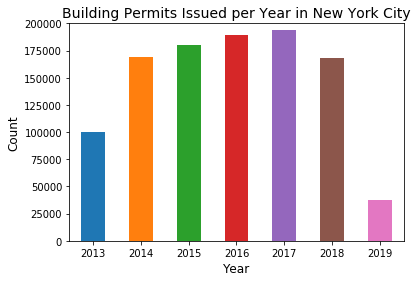

In [9]:
df['Issuance Date'].dt.year.value_counts().sort_index().plot(kind='bar')

#Plot the data
plt.title('Building Permits Issued per Year in New York City', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,200000)
plt.xticks(rotation='horizontal')
plt.show()

#### *Note: The data for 2019 only includes few weeks. Since the sample is so small, we should probably remove it from the analysis

In [10]:
df = df[df['Issuance Date'].dt.year != 2019] 

### Identify types of permits that are often issued?

In [11]:
df['Permit Type'].value_counts().sort_values(ascending=False) 

EW    482915
PL    199569
EQ    148442
AL     71781
NB     39021
FO     31006
SG     14986
DM     11538
Name: Permit Type, dtype: int64

#### What exactly do these codes mean? We can use information posted by the Department of Buildings to find out.

New York City Department of Buildings Permit Types

https://www1.nyc.gov/site/buildings/industry/permit-type-and-job-status-codes.page

Changing the names to make them more readable.

In [12]:
df['Permit Type'] = df['Permit Type'].map({'EW': 'Equipment Work', 'PL': 'Plumbing',
                                            'EQ': 'Construction Equipment', 'AL': 'Alteration',
                                            'NB': 'New Building', 'FO': 'Foundation',
                                            'SG': 'Sign', 'DM': 'Demolition'})

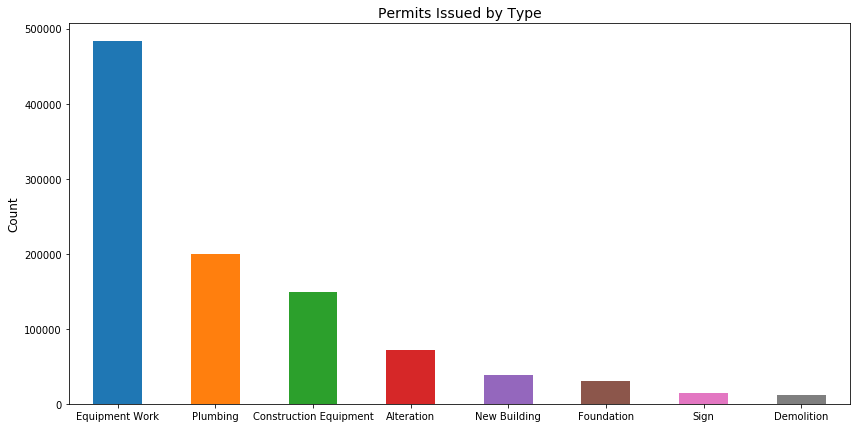

In [13]:
#Plotting the data
fig = plt.figure(figsize=(14,7))

df['Permit Type'].value_counts().plot(kind='bar')

plt.title('Permits Issued by Type', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

### Where were most building permits issued between 2013-2018?

In [14]:
df.rename(columns={' ':'Borough'}, inplace=True)

In [15]:
df['Borough'].value_counts()

MANHATTAN        421569
BROOKLYN         259474
QUEENS           197269
BRONX             74798
STATEN ISLAND     46148
Name: Borough, dtype: int64

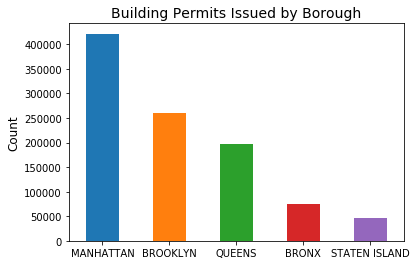

In [16]:
#Plotting the data
df['Borough'].value_counts().plot(kind='bar')
plt.title('Building Permits Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

### What percentage of the total permits have been issued for Manhattan and Brooklyn?

In [17]:
len(df[df['Borough'] == 'MANHATTAN']) / len(df)

0.42188203647106154

In [18]:
len(df[df['Borough'] == 'BROOKLYN']) / len(df)

0.259666672671122

### What percentage of borough permits are for residential projects?

In [19]:
Boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in Boroughs: 
    print('\n' + i) 
    print(df[df['Borough'] == i]['Residential'].value_counts() / len(df[df['Borough'] == i]))


BROOKLYN
YES    0.648366
Name: Residential, dtype: float64

MANHATTAN
YES    0.45848
Name: Residential, dtype: float64

QUEENS
YES    0.61625
Name: Residential, dtype: float64

STATEN ISLAND
YES    0.641133
Name: Residential, dtype: float64

BRONX
YES    0.556298
Name: Residential, dtype: float64


#### Looks like Manhattan is the only borough to issue more permits for commercial projects than residential!
How many permits have been issued by zip code?

In [20]:
df['Zip Code'].value_counts().sort_index().head(5)

0.0           39
4452.0         9
10000.0       35
10001.0    19374
10002.0    11092
Name: Zip Code, dtype: int64

##### It is helpful to know the 5 zip codes with the most permits issues but it doesn't tell where they are in the city. Let's map the data to get an idea of where these are located, through visual inspection.

Visualize permits by zip code
In order to visualize the permits on a heatmap, we must merge permit count data with a geometric shape file for NYC zip code boundaries. Next we need to download the zip code boundary data from New York’s open data portal.

New York City Zip Code Boundaries Shapefile

Data Source: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data

In [29]:
zip_codes = GeoDataFrame.from_file('C:/Users/ansha/ZIP_CODE_040114/ZIP_CODE_040114.shp')

In order to merge two dataframes, there must be a shared column. The shared column must have the same data type.

Ensure zip code column data types are the same for merging.

Count the number of occurrences for each zip code in the data frame, then convert the data series to a data frame for merging.

In [31]:
counts = df['Zip Code'].value_counts()
counts = counts.to_frame(name='count')
counts = counts.reset_index()

Merge the number of occurences for each zip code, with the corresponding zip code polygon

In [32]:
counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='Zip Code'))

Initially, when attempting to plot the counts, the code returned an error. Turns out there were more bad zip codes in the data, so we'll need to drop all NaNs in the geometry column.

In [33]:
counts = counts.dropna()

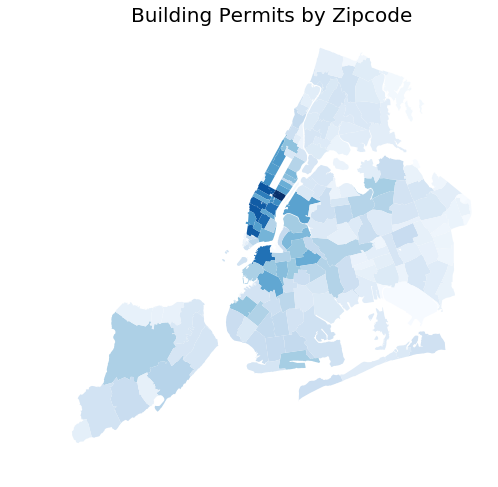

In [35]:
#Plotting the data
fig, ax = plt.subplots(figsize = (8,8))

counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

plt.title('Building Permits by Zipcode', size=20)
plt.axis('off')
plt.show()

#### The heatmap is darker in areas with more permits issued, and lighter in areas with fewer permits issued.

## Conclusion
Between the years 2013-2019, the New York City Department of Buildings issued over 600,000 building permits, where 44% of them were for work in the borough of Manhattan. There was a 51% spike in the number of building permits issued from the year 2013 to 2014, which seems to be pretty significant. In further exploration, one might dig a bit deeper to find out why there was such an increase between those years.

The New York City neighborhood Midtown East (zip code 10022) had the greatest number of permits issued between 2013- 2018. Midtown East is the home of the famous 5th Avenue shopping district, St. Patrick's Cathedral, and a host of other attractions. Considering the area generates a ton of traffic from tourists, shoppers, and workers alike, it is unsurprising that a high volume construction work is done to maintain the area and continue to drive the NYC economy. Such construction could have also been in anticipation of the new MTA yellow line train, the Q train, which runs along 2nd avenue on the east side and opened in January 2017.

Visualizing the building permits issued by zipcode provides better context for where permits have been issued. Merging the building data with a shape file allows you to display the density of building permits issued and locate the hotspots. For someone unfamiliar with zip codes in New York, the visual representation provides clues to spatial positioning. For example, one can see that the darkest spot is right beneath Central Park, which is more informative than simply identifying the darkest spot as zip code 10022.

## Future Exploration
This exploratory analysis can be used as a foundation for more sophisticated research. Here are a few potential areas of interest for future exploration:

1. Trends for specific permit types over time
2. Contractors that receive the most permits
3. Trends for specific zip codes over time & reasons for the trend
4. Distribution of initial vs renewal permits issued

In [55]:
import sys
'geopandas' in sys.modules

False

Text(0, 0.5, 'Year')

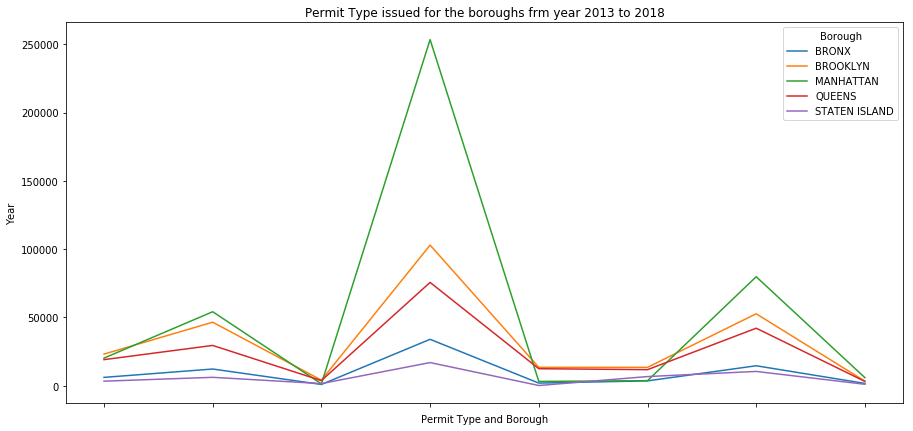

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
df['year'] = df['Issuance Date'].dt.year
df.groupby(['Permit Type','Borough']).count()['year'].unstack().plot(ax=ax)
ax.set_title("Permit Type issued for the boroughs frm year 2013 to 2018")
ax.set_xlabel("Permit Type and Borough")
ax.set_ylabel("Year")